# Instalação de pacotes

In [ ]:
#!pip install pybind11
#!pip install riskfolio-lib

# Importação de pacotes

In [102]:
import yfinance as yf
import pandas as pd
import riskfolio as rp
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

# Leitura dos dados

## Dados fundamentalistas

In [106]:
# empresas financeiras
kpis_fin = pd.read_excel("datasets/Stock_Screener_financeiras.xlsx", skiprows = 2)
# empresas não financeiras
kpis_n_fin = pd.read_excel("datasets/Stock_Screener_nao_financeiras.xlsx", skiprows = 2)
# combinar dados
kpis = pd.concat([kpis_fin, kpis_n_fin], axis = 0)

## Dados da B3

In [108]:
# listagem dos ativos
tickers_br = ['HAPV3.SA', 'B3SA3.SA', 'PETR4.SA', 'COGN3.SA', 'ABEV3.SA', 'CRFB3.SA', 'MGLU3.SA', 'BBDC4.SA', 'AZUL4.SA', 'PDGR3.SA', 'VALE3.SA', 'LREN3.SA', 'RAIL3.SA', 'CPLE6.SA', 'ITSA4.SA', 'ASAI3.SA', 'AESB3.SA', 'ITUB4.SA', 'VAMO3.SA', 'RAIZ4.SA', 'CVCB3.SA', 'NTCO3.SA', 'PCAR3.SA', 'BBAS3.SA', 'USIM5.SA', 'HYPE3.SA', 'ENEV3.SA', 'GGBR4.SA', 'CMIG4.SA', 'ELET3.SA', 'MRVE3.SA', 'ANIM3.SA', 'CSAN3.SA', 'STBP3.SA', 'BEEF3.SA', 'RENT3.SA', 'EQTL3.SA', 'BPAC11.SA', 'YDUQ3.SA', 'PRIO3.SA', 'POMO4.SA', 'CBAV3.SA', 'BRFS3.SA', 'BRAP4.SA', 'CPLE3.SA', 'LJQQ3.SA', 'RADL3.SA', 'IFCM3.SA', 'JBSS3.SA', 'CCRO3.SA', 'GFSA3.SA', 'BBSE3.SA', 'VBBR3.SA', 'PETR3.SA', 'WEGE3.SA', 'CSNA3.SA', 'LWSA3.SA', 'SUZB3.SA', 'BRAV3.SA', 'GOAU4.SA', 'UGPA3.SA', 'MULT3.SA', 'BBDC3.SA', 'SEQL3.SA', 'CMIN3.SA', 'TIMS3.SA', 'ECOR3.SA', 'EMBR3.SA', 'ALOS3.SA', 'VIVA3.SA', 'CYRE3.SA', 'RDOR3.SA', 'PETZ3.SA', 'ENGI11.SA', 'HBSA3.SA', 'GMAT3.SA', 'IRBR3.SA', 'QUAL3.SA', 'RCSL4.SA', 'MRFG3.SA', 'MOVI3.SA', 'PSSA3.SA', 'GGPS3.SA', 'AURE3.SA', 'FLRY3.SA', 'CXSE3.SA', 'GOLL4.SA', 'BRKM5.SA', 'SIMH3.SA', 'AZEV4.SA', 'KLBN11.SA', 'CEAB3.SA', 'SBSP3.SA', 'SBFG3.SA', 'SLCE3.SA', 'TOTS3.SA', 'IGTI11.SA', 'IGTI11.SA', 'PORT3.SA', 'POSI3.SA', 'RECV3.SA', 'DXCO3.SA', 'CPFE3.SA', 'TEND3.SA', 'MLAS3.SA', 'VVEO3.SA', 'CURY3.SA', 'SMFT3.SA', 'SRNA3.SA', 'SANB11.SA', 'NEOE3.SA', 'BHIA3.SA', 'DIRR3.SA', 'JHSF3.SA', 'ALPA4.SA', 'CLSA3.SA', 'POMO3.SA', 'TRPL4.SA', 'VIVT3.SA', 'BPAN4.SA', 'RAPT4.SA', 'TTEN3.SA', 'LUPA3.SA', 'SMTO3.SA', 'AZZA3.SA', 'ELET6.SA', 'HBRE3.SA', 'EZTC3.SA', 'CSMG3.SA', 'MILS3.SA', 'RANI3.SA', 'TAEE11.SA', 'PLPL3.SA', 'ODPV3.SA', 'ONCO3.SA', 'MDIA3.SA', 'BRSR6.SA', 'SAPR4.SA', 'EGIE3.SA', 'ENJU3.SA', 'ORVR3.SA', 'GUAR3.SA', 'AMER3.SA', 'KLBN4.SA', 'GRND3.SA', 'ARML3.SA', 'ALUP11.SA', 'EVEN3.SA', 'JFEN3.SA', 'KEPL3.SA', 'TUPY3.SA', 'BMGB4.SA', 'FESA4.SA', 'ITUB3.SA', 'OPCT3.SA', 'SAPR11.SA', 'DASA3.SA', 'AGRO3.SA', 'ROMI3.SA', 'VULC3.SA', 'ABCB4.SA', 'JALL3.SA', 'SYNE3.SA', 'MDNE3.SA', 'SOJA3.SA', 'PMAM3.SA', 'TGMA3.SA', 'MYPK3.SA', 'INTB3.SA', 'BRIT3.SA', 'RCSL3.SA', 'CASH3.SA', 'CAML3.SA', 'MATD3.SA', 'MELK3.SA', 'HBOR3.SA', 'BLAU3.SA', 'ZAMP3.SA', 'AZEV3.SA', 'OIBR3.SA', 'TRAD3.SA', 'AGXY3.SA', 'RNEW4.SA', 'TECN3.SA', 'BRBI11.SA', 'LIGT3.SA', 'CSED3.SA', 'VLID3.SA', 'USIM3.SA', 'PNVL3.SA', 'SEER3.SA', 'SHUL4.SA', 'TRIS3.SA', 'TASA4.SA', 'MTRE3.SA', 'LEVE3.SA', 'MBLY3.SA', 'JSLG3.SA', 'LAVV3.SA', 'MEAL3.SA', 'VITT3.SA', 'ALPK3.SA', 'PRNR3.SA', 'ELMD3.SA', 'PTBL3.SA', 'WIZC3.SA', 'TFCO4.SA', 'FIQE3.SA', 'BMOB3.SA', 'VIVR3.SA', 'FRAS3.SA', 'LOGG3.SA', 'CMIG3.SA', 'UNIP6.SA', 'AMBP3.SA', 'PINE4.SA', 'GGBR3.SA', 'TCSA3.SA', 'VTRU3.SA', 'PGMN3.SA', 'PFRM3.SA', 'LPSB3.SA', 'LOGN3.SA', 'SAPR3.SA', 'KLBN3.SA', 'SHOW3.SA', 'TAEE4.SA', 'ATOM3.SA', 'TPIS3.SA', 'AMAR3.SA', 'ITSA3.SA', 'AERI3.SA', 'RNEW3.SA', 'DESK3.SA', 'BIOM3.SA', 'ETER3.SA', 'EUCA4.SA', 'SANB4.SA', 'ESPA3.SA', 'BOBR4.SA', 'PDTC3.SA', 'BRAP3.SA', 'WEST3.SA', 'BMEB4.SA', 'TAEE3.SA', 'ATMP3.SA', 'RSID3.SA', 'GOAU3.SA', 'SANB3.SA', 'DEXP3.SA', 'DMVF3.SA', 'CSUD3.SA', 'KRSA3.SA', 'ALLD3.SA', 'AALR3.SA', 'INEP3.SA', 'IGTI3.SA', 'IGTI3.SA', 'RPMG3.SA', 'UCAS3.SA', 'NGRD3.SA', 'BAHI3.SA', 'EALT4.SA', 'CAMB3.SA', 'DOTZ3.SA', 'RNEW11.SA', 'PTNT4.SA', 'LAND3.SA', 'INEP4.SA', 'OFSA3.SA', 'TASA3.SA', 'SCAR3.SA', 'CTSA4.SA', 'HAGA4.SA', 'BRSR3.SA', 'RAPT3.SA', 'LVTC3.SA', 'ALUP4.SA', 'BEES3.SA', 'BRKM3.SA', 'EQPA3.SA', 'ENGI4.SA', 'OIBR4.SA', 'CEBR6.SA', 'ENGI3.SA', 'BPAC3.SA', 'GSHP3.SA', 'BPAC5.SA', 'COCE5.SA', 'UNIP3.SA', 'MGEL4.SA', 'ALUP3.SA', 'NUTR3.SA', 'TELB4.SA', 'FHER3.SA', 'BALM4.SA', 'EPAR3.SA', 'OSXB3.SA', 'WHRL4.SA', 'HOOT4.SA', 'PINE3.SA', 'NINJ3.SA', 'ALPA3.SA', 'NEXP3.SA', 'RSUL4.SA', 'CGRA4.SA', 'FRIO3.SA', 'MTSA4.SA', 'TRPL3.SA', 'BEES4.SA', 'REDE3.SA', 'CLSC4.SA', 'CRPG5.SA', 'MNDL3.SA', 'CTSA3.SA', 'CEBR5.SA', 'EUCA3.SA', 'EQMA3B.SA', 'CEBR3.SA', 'FESA3.SA', 'CGAS5.SA', 'BMIN4.SA', 'WLMM4.SA', 'RDNI3.SA', 'PPLA11.SA', 'BGIP4.SA', 'DTCY3.SA', 'BAZA3.SA', 'UNIP5.SA', 'ESTR4.SA', 'AVLL3.SA', 'AZEV11.SA', 'AMAR11.SA', 'EALT3.SA', 'VSTE3.SA', 'AHEB3.SA', 'CGRA3.SA', 'EKTR4.SA', 'EMAE4.SA', 'MNPR3.SA', 'TELB3.SA', 'HAGA3.SA', 'DASA11.SA', 'BIOM11.SA', 'MRSA3B.SA', 'BGIP3.SA', 'BSLI4.SA', 'DEXP4.SA', 'PLAS3.SA', 'SNSY5.SA', 'CEEB3.SA', 'HBTS5.SA', 'PATI3.SA', 'HETA4.SA', 'BMKS3.SA', 'FIEI3.SA', 'CEDO3.SA', 'CEDO4.SA', 'CTKA4.SA', 'GEPA4.SA', 'WHRL3.SA', 'BNBR3.SA', 'BSLI3.SA', 'CPLE5.SA', 'CTKA3.SA', 'MRSA5B.SA', 'CRPG6.SA', 'PTNT3.SA', 'GEPA3.SA', 'PSVM11.SA', 'BALM3.SA', 'BRKM6.SA', 'AFLT3.SA', 'DOHL4.SA', 'PEAB3.SA', 'PEAB4.SA', 'BMEB3.SA', 'PATI4.SA', 'BRSR5.SA', 'MERC4.SA', 'COCE3.SA', 'WLMM3.SA', 'JOPA3.SA', 'ENMT3.SA', 'GPAR3.SA', 'SNSY3.SA', 'CLSC3.SA', 'MWET4.SA', 'NORD3.SA', 'BDLL4.SA', 'IGTI4.SA', 'IGTI4.SA', 'PINE11.SA', 'AHEB5.SA', 'TEKA4.SA', 'CEGR3.SA', 'BAUH4.SA', 'RPAD5.SA', 'SOND3.SA', 'SOND6.SA']

# início dos dados (5 anos antes)
# hoje = datetime.datetime.today()
hoje = datetime.datetime(2024, 10, 31)
start = hoje-relativedelta(years=5)
start.strftime("%Y-%m-%d")

# download dos dados
data_b3 = yf.download(tickers_br, start = start, end = hoje)
# histórico do ibov
data_ibov = yf.download("^BVSP", start = start, end = hoje)

[*********************100%***********************]  397 of 397 completed

5 Failed downloads:
['AMAR11.SA', 'BIOM11.SA', 'PINE11.SA', 'AZEV11.SA', 'DASA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


# Tratamento dos dados

In [157]:
# Pegando ticker da mesma empresa com maior liquidez dos últimos 3 meses
max_liq = kpis.groupby("Empresa")["Volume Diário Médio (3 meses)"].max()
kpis = kpis.merge(max_liq)

## Filtrando ativos

Filtros:
* Margem Líquida acima de 5%
* (Ev/Ebit menor que 10 ou sem Ev/Ebit(bancos)) ou Preço/Vpa menor que 1
* Preço/Vpa menor que 3
* ROE maior que 10%
* DY 12 meses maior que 1%

In [159]:
# Filtrando ativos
ativos_filtros = kpis[
  (kpis["Margem Líquida"]>0.05) & 
  ((kpis["EV/EBIT"]<10) | (kpis["EV/EBIT"].isna()) | (kpis["Preço/VPA"]<1)) & 
  (kpis["Preço/VPA"]<3) &
  (kpis["RPL"] > 0.1) &
  (kpis["Dividend Yield"] > 0.01)
]["Ação"]
tickers_filtros = [x+'.SA' for x in ativos_filtros]
# Checando quantidade de ativos
len(tickers_filtros)

53

Filtro de liquidez:
* liquidez média dos últimos 90 dias maior que 1M
* no máximo 500 dias com valores faltantes em 5 anos

In [215]:
# Calculando liquidez
liquidez = (data_b3["Volume"]*data_b3["Close"]).rolling(3*30).mean().iloc[-1,:]
# Calculando valores NA
na = data_b3["Volume"].isna().sum()
# Filtrando ativos
ativos_liquidez = liquidez[(liquidez>1000000) & (na < 500)].index

# Remoção de ativos individuais
ativos_rm = [""]

# Ativos finais
filtros_total = [x for x in ativos_liquidez if x in tickers_filtros and x not in ativos_rm]
len(filtros_total)

53

In [217]:
# Pegar preço de fechamento
data_fechamento = data_b3["Adj Close"][filtros_total]

# Calculando retornos diários
retornos = data_fechamento.pct_change().dropna()

retornos.head()

C:\Users\PedroHenriqueCorread\AppData\Local\Temp\ipykernel_15008\2793187137.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = data_fechamento.pct_change().dropna()


Ticker,ABCB4.SA,BBAS3.SA,BMOB3.SA,BPAC11.SA,BRBI11.SA,BRSR6.SA,CCRO3.SA,CMIG4.SA,CMIN3.SA,CPFE3.SA,...,SYNE3.SA,TAEE11.SA,TGMA3.SA,TRPL4.SA,TTEN3.SA,VALE3.SA,VAMO3.SA,VLID3.SA,VULC3.SA,WIZC3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-30 00:00:00+00:00,-0.033722,-0.023162,-0.014599,-0.048940,0.041304,-0.006441,-0.033457,-0.013223,-0.029536,-0.020503,...,-0.036752,-0.001837,-0.040889,-0.023472,-0.008772,-0.058925,0.011126,-0.006734,-0.023810,-0.012731
2021-08-02 00:00:00+00:00,0.010067,0.013595,0.031746,0.013379,0.003340,0.012156,0.006923,-0.005863,0.009079,0.003949,...,0.020408,0.039969,0.007878,0.027766,-0.009735,0.001563,-0.008830,0.003390,0.011086,0.154094
2021-08-03 00:00:00+00:00,-0.007309,-0.005615,0.033333,0.015572,-0.002081,-0.014411,0.005347,0.006740,-0.026816,0.004327,...,-0.014783,-0.008091,-0.017011,-0.003226,-0.016979,0.034059,-0.007401,-0.036036,-0.004386,-0.031844
2021-08-04 00:00:00+00:00,-0.016064,-0.014743,-0.007444,-0.006000,0.089658,-0.013810,-0.032675,-0.012552,0.004592,0.004309,...,-0.019418,0.006373,-0.020580,-0.004450,0.000000,-0.001065,-0.030655,-0.019860,0.002202,-0.019042
2021-08-05 00:00:00+00:00,-0.008844,-0.017829,-0.025500,-0.003354,0.032912,-0.011532,-0.007070,-0.016102,-0.028571,-0.024571,...,-0.017102,-0.010132,-0.032951,-0.013409,0.000000,-0.030572,-0.038461,-0.008343,-0.008791,0.027059


# Otimização de Portifólio

## Definição de hiperparâmetros

In [221]:
method_mu = 'hist'  # método de estimação da média
method_cov = 'hist' # Método de estimação da covariância
hist = True         # Utilização de histórico
model = 'Classic'   # Modelo
rm = 'MV'           # Medida de risco
obj = 'Sharpe'      # Objetivo
rf = 0              # Taxa livre de risco
l  = 0

## Restrições

Restrições:
* Máximo de um ativo: 15%

In [225]:
asset_classes = {'Assets': retornos.columns,
                 'Class 1': 'All',
                 'Class 2':'All'}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, True],
               'Type': ['All Assets', 'All Assets'],
               'Set': ['', ''],
               'Position': ['', ''],
               'Sign': ['<=', '>='],
               'Weight': [0.15, 0.01],
               'Type Relative': ['', ''],
               'Relative Set': ['', ''],
               'Relative': ['', ''],
               'Factor': ['','']}

constraints = pd.DataFrame(constraints)

## Otimização

In [228]:
# Restrições
A, B = rp.assets_constraints(constraints, asset_classes)

# Portifólio
port = rp.Portfolio(returns = retornos, ainequality = A, binequality = B)

# Definição de hiperparâmetros
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Otimização
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

In [229]:
# Plotando pesos de cada ativo
w.sort_values("weights", ascending = False).round(2).head(13)

,weights
PETR4.SA,0.15
POMO4.SA,0.15
CMIG4.SA,0.15
PSSA3.SA,0.15
CSMG3.SA,0.10
VLID3.SA,0.08
VULC3.SA,0.06
SYNE3.SA,0.05
BBAS3.SA,0.05
SAPR11.SA,0.02


## Fronteira eficiente

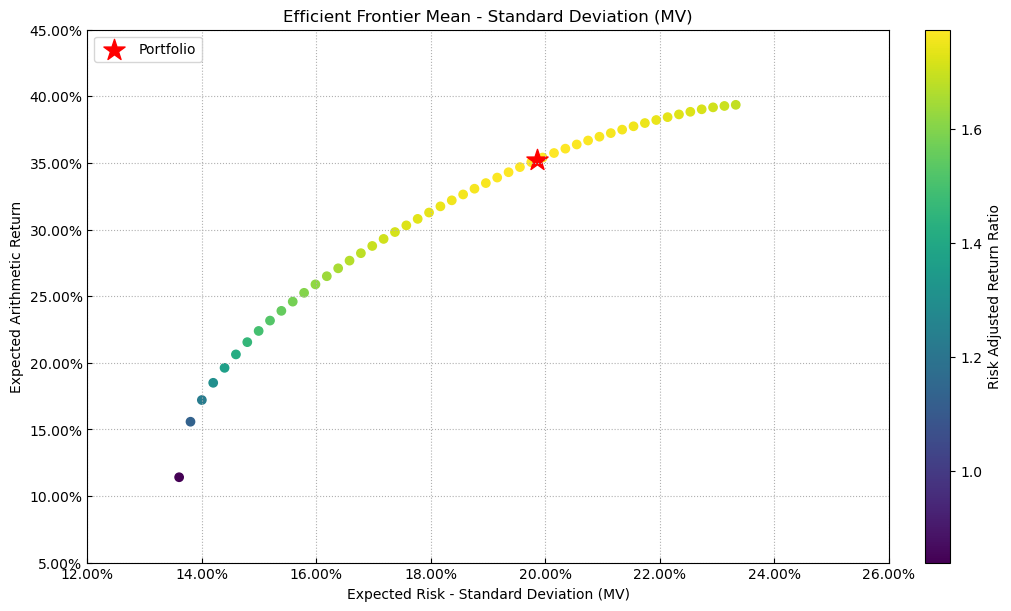

In [233]:
frontier = port.efficient_frontier(model = model, rm=rm, points=50, rf=rf, hist=hist)

ax = rp.plot_frontier(w_frontier=frontier, mu = port.mu, cov=port.cov, returns = retornos, rm=rm,
                     rf=rf, cmap='viridis', w=w)
plt.show()

## Portifolio

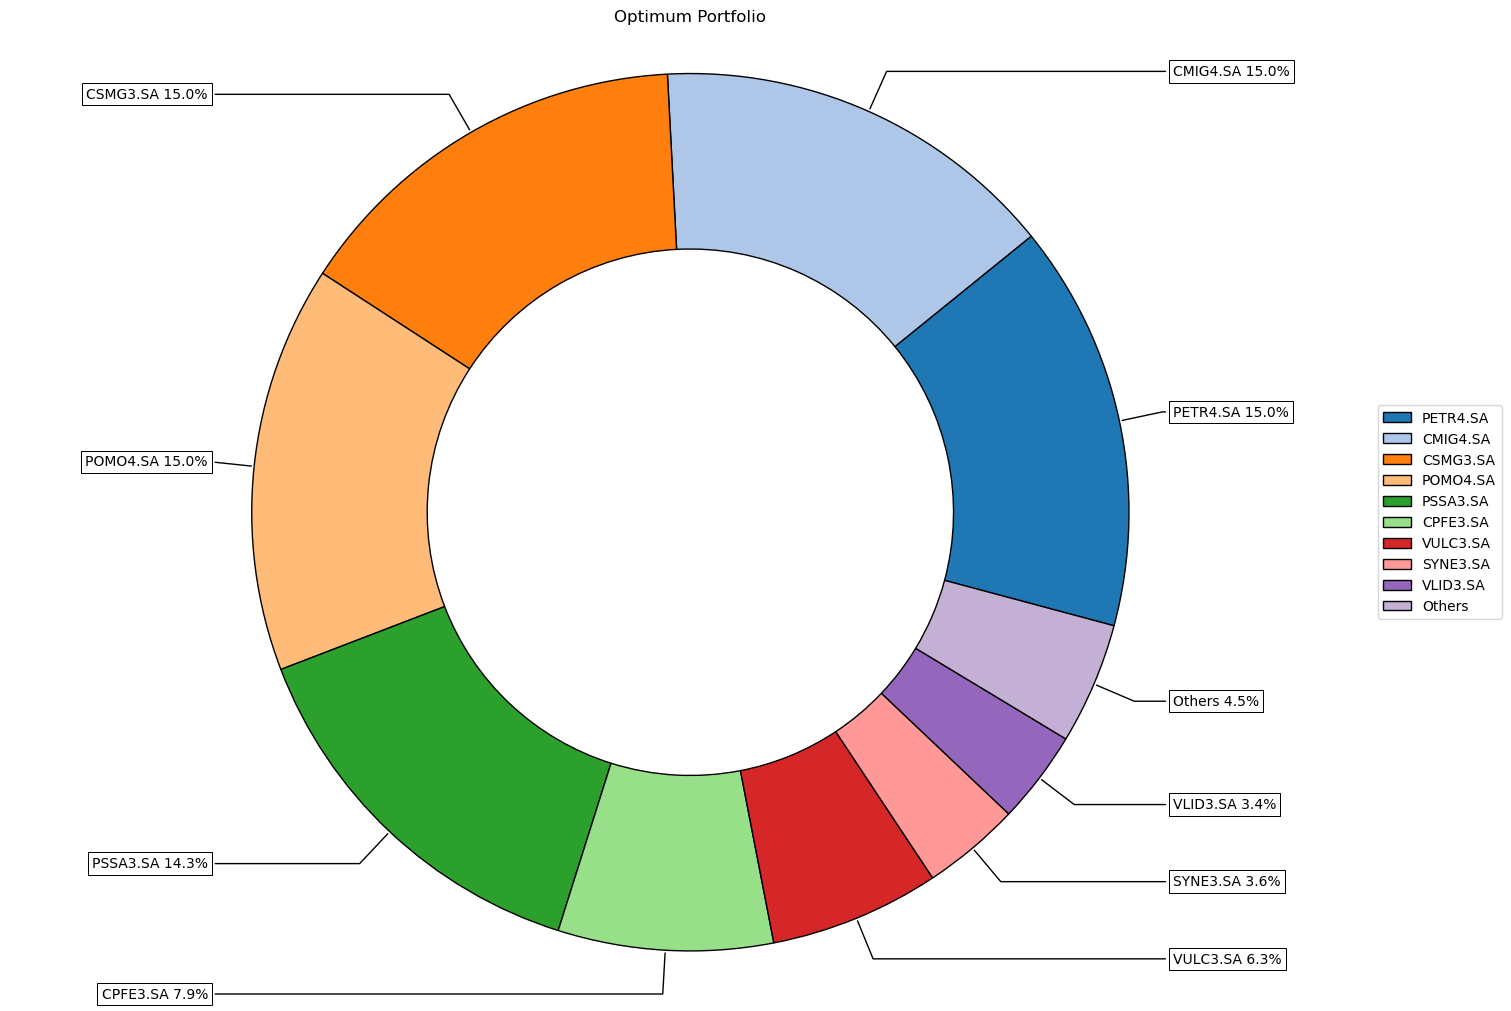

In [241]:
fig, ax = plt.subplots(figsize = (15, 10))
rp.plot_pie(w=w, title = "Optimum Portfolio", others = 0.05, cmap = 'tab20', ax = ax)
plt.show()

## Impacto de diferentes medidas de risco

In [238]:
rms = ['MV','CVaR','MDD', 'ADD']
w_s = pd.DataFrame([])
columns = []
for rm in rms:
    try:
      w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

      w_s = pd.concat([w_s, w], axis=1)
      columns.append(rm)
    except:
      pass
w_s.columns = columns
w_s.sort_values("MV", ascending = False).style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,CVaR,MDD,ADD
PETR4.SA,15.00%,15.00%,7.93%,15.00%
POMO4.SA,15.00%,15.00%,10.79%,15.00%
CMIG4.SA,15.00%,15.00%,15.00%,15.00%
PSSA3.SA,15.00%,15.00%,2.74%,14.30%
CSMG3.SA,9.64%,11.39%,15.00%,15.00%
VLID3.SA,8.08%,11.36%,15.00%,3.43%
VULC3.SA,6.46%,0.00%,9.80%,6.27%
SYNE3.SA,5.49%,9.89%,0.00%,3.62%
BBAS3.SA,4.88%,0.00%,0.00%,1.74%
SAPR11.SA,2.18%,7.36%,0.00%,0.00%
